### Importing Libraries

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



### Loading Datasets

In [3]:
data = pd.read_csv("Student Performance new.csv")

### Data Cleaning

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1000 non-null   int64  
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math percentage              1000 non-null   float64
 6   reading score percentage     1000 non-null   float64
 7   writing score percentage     1000 non-null   float64
 8   sex                          1000 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [13]:
data.head(10)

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,4,group C,some college,standard,none,0.76,0.78,0.75,M
5,5,group B,associate's degree,standard,none,0.71,0.83,0.78,F
6,6,group B,some college,standard,completed,0.88,0.95,0.92,F
7,7,group B,some college,free/reduced,none,0.40,0.43,0.39,M
8,8,group D,high school,free/reduced,completed,0.64,0.64,0.67,M
9,9,group B,high school,free/reduced,none,0.38,0.60,0.50,F


In [14]:

data = data.drop(columns='Unnamed: 0')



### Exploratory Data Analysis

In [18]:
data.describe()



,math percentage,reading score percentage,writing score percentage
count,1000.000000,1000.000000,1000.000000
mean,0.660890,0.691690,0.680540
std,0.151631,0.146002,0.151957
min,0.000000,0.170000,0.100000
25%,0.570000,0.590000,0.577500
50%,0.660000,0.700000,0.690000
75%,0.770000,0.790000,0.790000
max,1.000000,1.000000,1.000000


In [19]:
data['sex'].value_counts()


sex
F    518
M    482
Name: count, dtype: int64

In [20]:

data.groupby('lunch')[['math percentage', 'reading score percentage', 'writing score percentage']].mean()


,math percentage,reading score percentage,writing score percentage
lunch,,,
free/reduced,0.589211,0.646535,0.630225
standard,0.700341,0.716543,0.708233


In [21]:
data.groupby('sex')[['math percentage', 'reading score percentage', 'writing score percentage']].mean()


,math percentage,reading score percentage,writing score percentage
sex,,,
F,0.636332,0.726081,0.724672
M,0.687282,0.654730,0.633112


### Visualizations

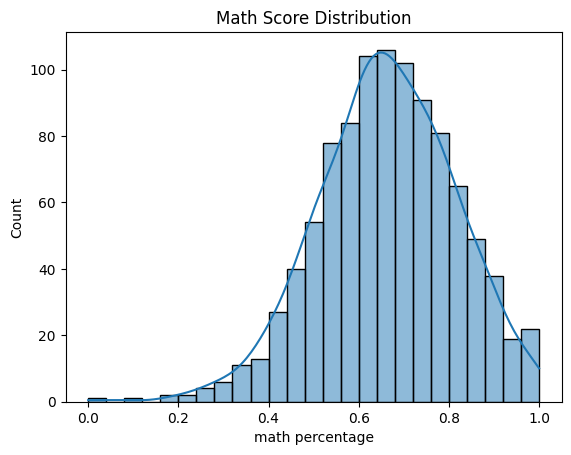

In [26]:
sns.histplot(data['math percentage'], kde= True)
plt.title('Math Score Distribution')
plt.show()


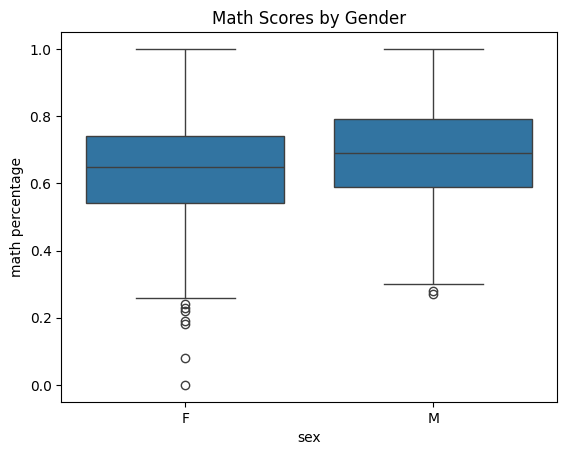

In [28]:
sns.boxplot(data=data, x='sex', y='math percentage')
plt.title('Math Scores by Gender')
plt.show()


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   race/ethnicity               1000 non-null   object 
 1   parental level of education  1000 non-null   object 
 2   lunch                        1000 non-null   object 
 3   test preparation course      1000 non-null   object 
 4   math percentage              1000 non-null   float64
 5   reading score percentage     1000 non-null   float64
 6   writing score percentage     1000 non-null   float64
 7   sex                          1000 non-null   object 
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [35]:
data_maths_english= data[["reading score percentage","writing score percentage","math percentage"]]

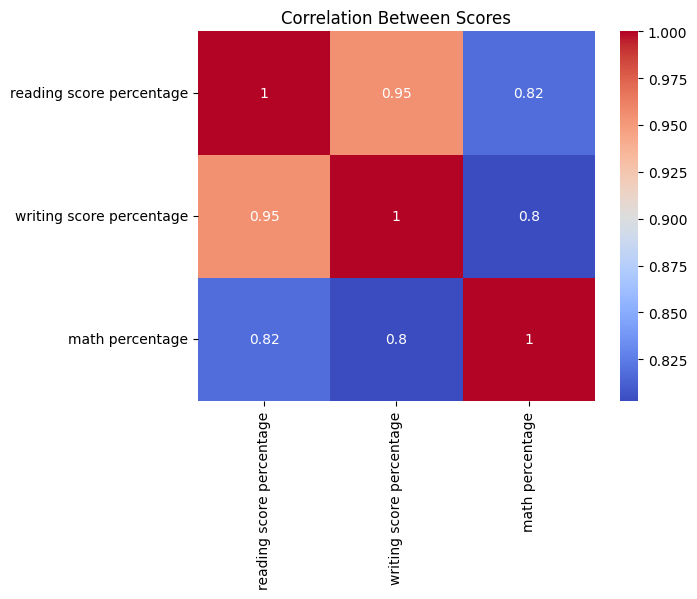

In [36]:
sns.heatmap(data_maths_english.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Scores')
plt.show()


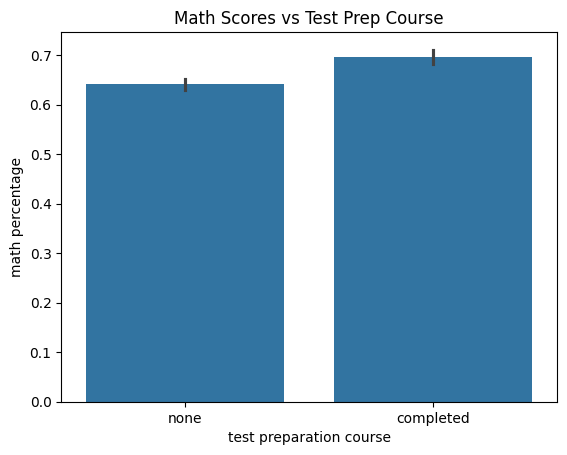

In [37]:
sns.barplot(data=data, x='test preparation course', y='math percentage')
plt.title('Math Scores vs Test Prep Course')
plt.show()


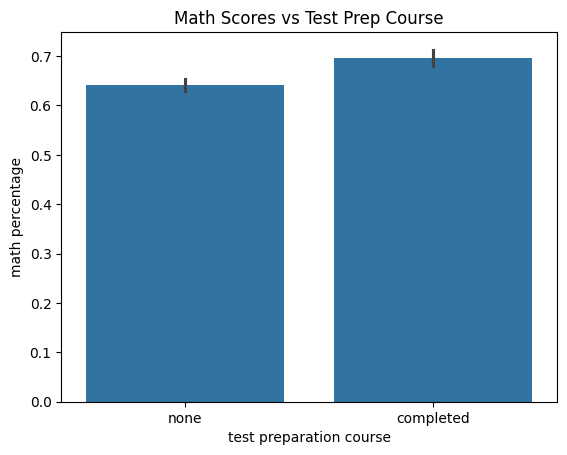

In [39]:
sns.barplot(data=data, x='test preparation course', y='math percentage')
plt.title('Math Scores vs Test Prep Course')
plt.show()


In [41]:
edu_vrs_scores=data.groupby('parental level of education')[['math percentage', 'reading score percentage', 'writing score percentage']].mean()

In [45]:
(edu_vrs_scores)

,math percentage,reading score percentage,writing score percentage
parental level of education,,,
associate's degree,0.678829,0.709279,0.698964
bachelor's degree,0.693898,0.730000,0.733814
high school,0.621378,0.647041,0.624490
master's degree,0.697458,0.753729,0.756780
some college,0.671283,0.694602,0.688407
some high school,0.634972,0.669385,0.648883


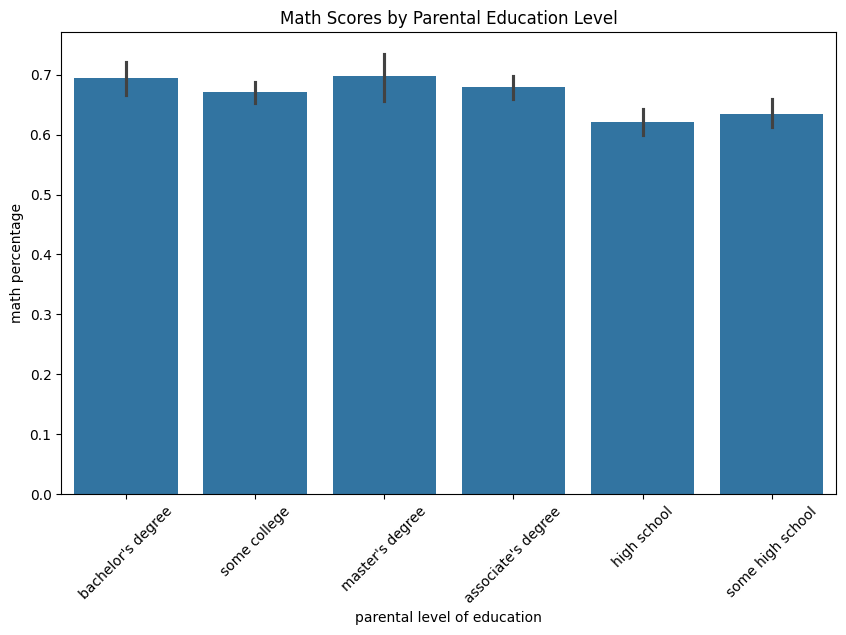

In [47]:
# Average scores by parental education
data.groupby('parental level of education')[
    ['math percentage', 'reading score percentage', 'writing score percentage']
].mean().sort_values(by='math percentage', ascending=False)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='parental level of education', y='math percentage')
plt.xticks(rotation=45)
plt.title('Math Scores by Parental Education Level')
plt.show()


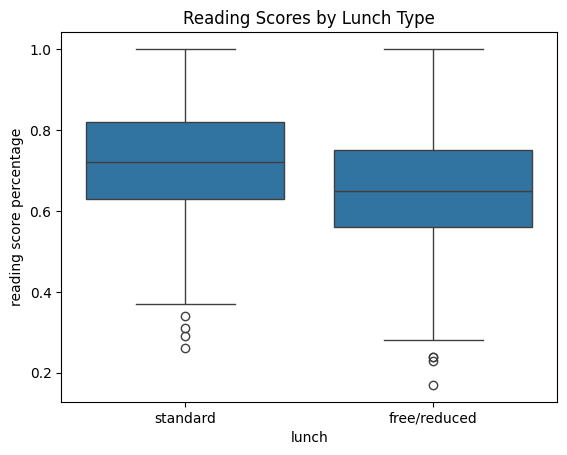

In [48]:
sns.boxplot(data=data, x='lunch', y='reading score percentage')
plt.title('Reading Scores by Lunch Type')
plt.show()


In [49]:
data.groupby('test preparation course')[['math percentage', 'reading score percentage', 'writing score percentage']].mean()


,math percentage,reading score percentage,writing score percentage
test preparation course,,,
completed,0.696955,0.738939,0.744190
none,0.640779,0.665343,0.645047


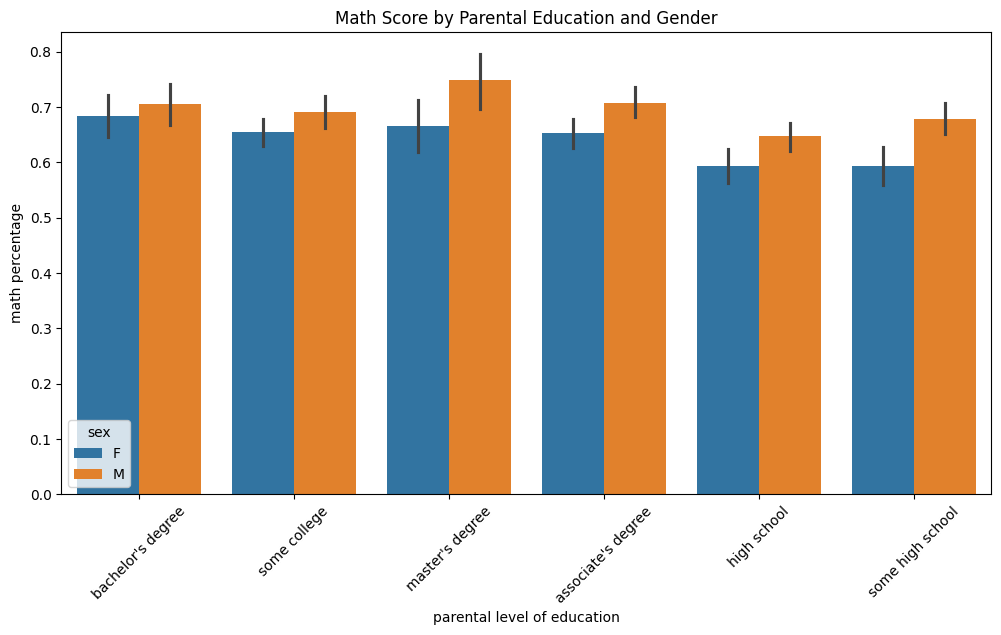

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='parental level of education', y='math percentage', hue='sex')
plt.xticks(rotation=45)
plt.title('Math Score by Parental Education and Gender')
plt.show()


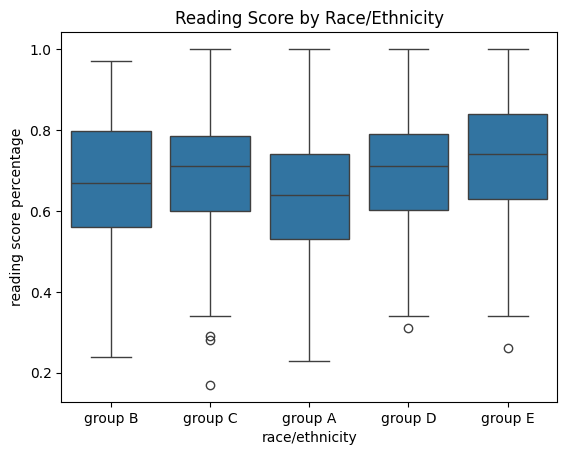

In [51]:
sns.boxplot(data=data, x='race/ethnicity', y='reading score percentage')
plt.title('Reading Score by Race/Ethnicity')
plt.show()


In [52]:
data['average score'] = data[['math percentage', 'reading score percentage', 'writing score percentage']].mean(axis=1)


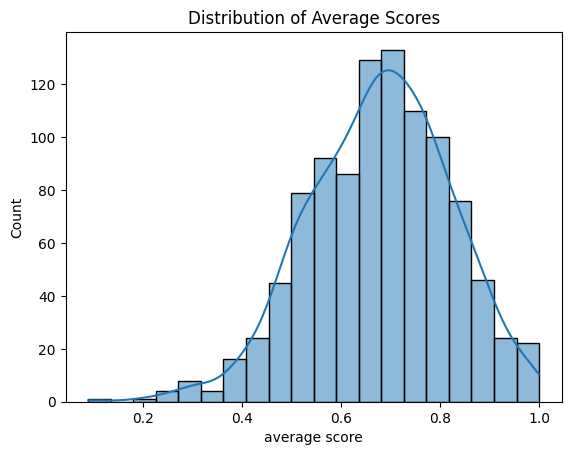

In [53]:
sns.histplot(data['average score'], bins=20, kde=True)
plt.title('Distribution of Average Scores')
plt.show()
